In [0]:

!pip install textblob
!pip install better-profanity

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached regex-2023.10.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (773 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/bin/python -m pip install --upgrade pip' command.
  Using cached better_profanity-0.7.0-py3-none-any.whl (46 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/bin/python -m pip install --upgrade pip' command.


In [0]:
!pip install wordcloud

  Using cached wordcloud-1.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (460 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/bin/python -m pip install --upgrade pip' command.


In [0]:
# Import Basic Libraries
import re
import os
import pandas as pd
import numpy as np
from datetime import datetime

from better_profanity import profanity
from textblob import TextBlob

# Import Visualization Libraries
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import NLP Libraries
import nltk
from nltk.corpus import stopwords

# downloading stopwords
nltk.download('stopwords')

# Remove distarcting warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#         print(os.path.join(dirname, filename))
df = pd.read_csv("/Workspace/Users/sai.nagandla@insightglobal.com/tweets.csv")
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(10)

Data Shape is : (50001, 6)

Show Top 10 Records


,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0
5,5,2023-03-29 15:21:29+00:00,FreeMindKeenEye,@IAMCouncil @POTUS @Ilhan @bridgeinit OK this ...,0.0,0.0
6,6,2023-03-29 15:20:41+00:00,SamsSamsson6,@darrengrimes_ Why are pakistani /indian dual ...,0.0,0.0
7,7,2023-03-29 15:20:16+00:00,SamsSamsson6,@PeterStefanovi2 Why are pakistani /indian dua...,0.0,0.0
8,8,2023-03-29 15:19:44+00:00,SamsSamsson6,Why are pakistani /indian dual nationals allow...,0.0,0.0
9,9,2023-03-29 15:19:32+00:00,ncsukumar1,@BesuraTaansane @KartiPC @PChidambaram_IN The ...,0.0,0.0


# New Section

In [0]:
#Checking Missing Values

df.isna().sum()

Out[5]: Unnamed: 0    0
Date          0
User          0
Tweet         1
Likes         2
Retweets      2
dtype: int64

In [0]:
#Drop NA Value
df.dropna(inplace=True)

In [0]:
#Checking Duplicates
df.duplicated().sum()

Out[7]: 0

In [0]:
#Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   Date        49999 non-null  object 
 2   User        49999 non-null  object 
 3   Tweet       49999 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [0]:
#Checking the number of unique values of each column
df.nunique()

Out[9]: Unnamed: 0    49999
Date          49820
User          35108
Tweet         49568
Likes           598
Retweets        312
dtype: int64

In [0]:
#Print numerical and categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))


We have 2 numerical columns(features) : ['Likes', 'Retweets']

We have 4 categorical columns(features) : ['Unnamed: 0', 'Date', 'User', 'Tweet']


In [0]:
df['Original_Tweet']=df['Tweet']
df['DateTime'] = df['Date']
df = df.drop('Date', axis=1)
df['DateTime'] = df['DateTime'].astype(str).apply(lambda x: x.split('+')[0])
# convert the 'DateTime' column to datetime format and replace invalid values with a default datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', format='%Y-%m-%d %H:%M:%S').fillna(pd.Timestamp('1900-01-01'))

df['date'] = df.DateTime.apply(lambda x: x.date())
df['month'] = df.DateTime.apply(lambda x: x.month)
df['year'] = df.DateTime.apply(lambda x: x.year)
df['hour'] = df.DateTime.apply(lambda x: x.hour)
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


In [0]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.


# define the stopwords list
stop_words = stopwords.words('english')

def clean_tweet(tweet):
    # convert to lower case
    tweet = tweet.lower()

    # remove twitter handlers
    tweet = re.sub('@[^\s]+', '', tweet)

    # remove hashtags
    tweet = re.sub(r'\B#\S+', '', tweet)

    # remove urls
    tweet = re.sub(r"http\S+", "", tweet)

    # remove special characters and punctuations
    tweet = re.sub(r'\W', ' ', tweet)

    # remove single characters except for 'a' and 'i'
    tweet = re.sub(r'\s+[a-hj-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+i\s+', ' I ', tweet)
    tweet = re.sub(r'\s+a\s+', ' a ', tweet)

    # substitute multiple spaces with single space
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)

    # remove stop words
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    return tweet

In [0]:
df['Tweet'] = df['Tweet'].apply(clean_tweet)

In [0]:
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,respected indian citizens namaskaar I original...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,respected indian citizens namaskaar I original...,0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talkin...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,would politicians stop using religion politics...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,state level president knows policy pm union mi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


In [0]:
import nltk
#nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

In [0]:
def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus

In [0]:
def preprocess(corpus, keep_list=[], stemming = False, stem_type = None, lemmatization = False):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)

    Input :
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'stemming', 'lemmatization' - Boolean variables indicating whether a particular task should
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer

    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together

    Output : Returns the processed text corpus

    '''

    if lemmatization == True:
        corpus = lemmatize(corpus)


    if stemming == True:
        corpus = stem(corpus, stem_type)

    corpus = [' '.join(tweet) for tweet in corpus]

    return corpus

In [0]:
corpus = df['Tweet'].str.split().tolist()

In [0]:
type(corpus)

Out[20]: list

In [0]:
# Preprocessing with Lemmatization here
preprocessed_corpus = preprocess(corpus, keep_list = [], stemming = False, stem_type = None,
                                lemmatization = True)


In [0]:
df['Tweet']=preprocessed_corpus

In [0]:
df

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,respect indian citizens namaskaar I original g...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,respect indian citizens namaskaar I original g...,0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,would politicians stop use religion politics i...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,state level president know policy pm union min...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15
...,...,...,...,...,...,...,...,...,...,...,...
49996,49995,vinoims,cong rule 60 yrs center amp state level indian...,0.0,0.0,@kaushikcbasu Cong ruled for 60 +yrs at center...,2022-10-15 11:00:52,2022-10-15,10,2022,11
49997,49996,Dan_T129,indian lobbyists win pakistani busy fight war ...,0.0,0.0,@ARYSabirShakir @OfficialDGISPR It's indian lo...,2022-10-15 10:56:51,2022-10-15,10,2022,10
49998,49997,shivashan_,true leader put team front success failure acc...,4.0,1.0,@Schandillia A true leader puts the team in fr...,2022-10-15 10:50:52,2022-10-15,10,2022,10
49999,49998,SUNILKU74204938,rahul gandhi mahanayak india regard bharat jod...,0.0,0.0,Now' Rahul Gandhi is Mahanayak of\nINDIA. Rega...,2022-10-15 10:41:17,2022-10-15,10,2022,10


In [0]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in df['Tweet']]

# Create a list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]


# Create a dataframe of each tweet against its polarity
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

df['Polarity']=sentiment_df['polarity']

In [0]:
# Create the new column using a lambda function and apply() to classify the tweets as Positive, Negative, or Neutral.
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [0]:
subset_df = df[['User', 'Tweet', 'Likes', 'Retweets', 'Polarity', 'Sentiment']]
subset_df.head()



,User,Tweet,Likes,Retweets,Polarity,Sentiment
0,AnandPatni8,respect indian citizens namaskaar I original g...,0.0,0.0,-0.062500,Negative
1,dhinamum,respect indian citizens namaskaar I original g...,0.0,0.0,-0.062500,Negative
2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,0.173232,Positive
3,RishiJoeSanu,would politicians stop use religion politics i...,0.0,0.0,0.000000,Neutral
4,itweetsensee,state level president know policy pm union min...,0.0,0.0,0.214286,Positive


In [0]:
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour,Polarity,Sentiment
0,0,AnandPatni8,respect indian citizens namaskaar I original g...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15,-0.062500,Negative
1,1,dhinamum,respect indian citizens namaskaar I original g...,0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15,-0.062500,Negative
2,2,PrincetonCGI,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15,0.173232,Positive
3,3,RishiJoeSanu,would politicians stop use religion politics i...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15,0.000000,Neutral
4,4,itweetsensee,state level president know policy pm union min...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15,0.214286,Positive


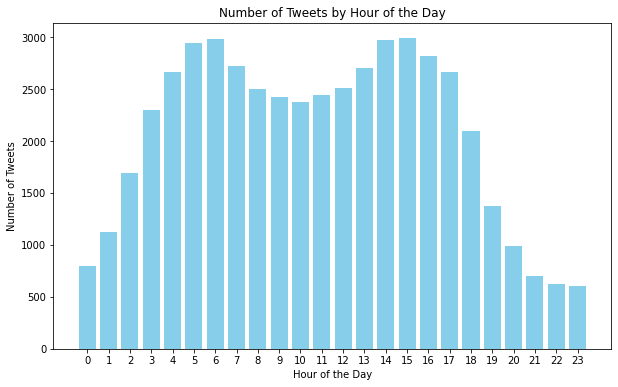

In [0]:
import matplotlib.pyplot as plt

# Grouping the data by hour and counting the number of tweets
tweet_counts_by_hour = df.groupby('hour').size()

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(tweet_counts_by_hour.index, tweet_counts_by_hour.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of the Day')
plt.xticks(range(24))  # Set the x-axis ticks to be the hours of the day (0 to 23)
plt.show()



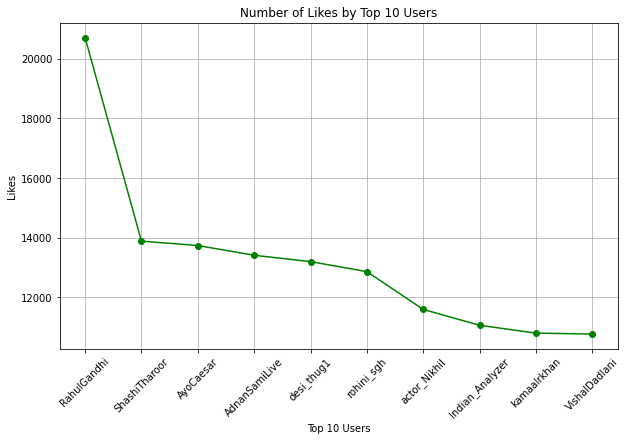

In [0]:

# Assuming df contains a column 'User' for usernames and 'Likes' for number of likes
top_10_users = df.groupby('User')['Likes'].sum().nlargest(10)

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_users.index, top_10_users.values, marker='o', color='green', linestyle='-')
plt.xlabel('Top 10 Users')
plt.ylabel('Likes')
plt.title('Number of Likes by Top 10 Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


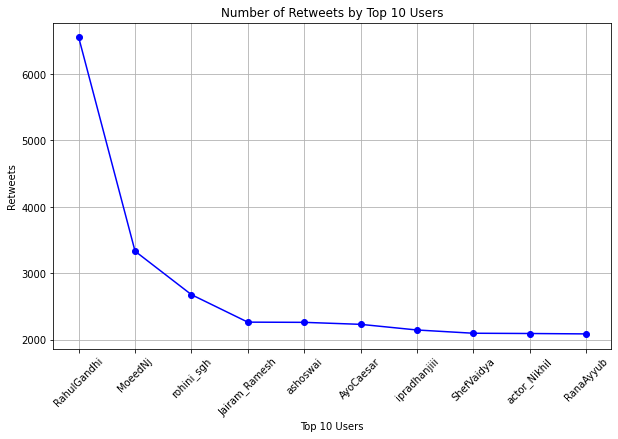

In [0]:


# Assuming df contains a column 'User' for usernames and 'Retweets' for number of retweets
top_10_users_retweets = df.groupby('User')['Retweets'].sum().nlargest(10)

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_users_retweets.index, top_10_users_retweets.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Top 10 Users')
plt.ylabel('Retweets')
plt.title('Number of Retweets by Top 10 Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


In [0]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Calculate the percentage for each sentiment
positive_percent = sentiment_counts['Positive'] / len(df) * 100
negative_percent = sentiment_counts['Negative'] / len(df) * 100
neutral_percent = sentiment_counts['Neutral'] / len(df) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_percent, negative_percent, neutral_percent]
colors = ['mediumseagreen', 'crimson', 'royalblue']
fig = px.pie(values=values, names=labels, color_discrete_sequence=colors)
fig.update_traces(textinfo='percent+label')

# Set the chart title and font size
fig.update_layout(title_text='Sentiment Distribution', title_font_size=24)

# Display the chart
fig.show()

In [0]:
!pip install plotly --upgrade 

!pip install pandas --upgrade 


  Using cached plotly-5.17.0-py2.py3-none-any.whl (15.6 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.6.0
    Not uninstalling plotly at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2
    Can't uninstall 'plotly'. No files were found to uninstall.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/bin/python -m pip install --upgrade pip' command.
  Using cached pandas-2.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached numpy-1.26.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nf

In [0]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0'+h
    h = h+ ":00"
    return h

sentiment_hourly = df.groupby(['Sentiment', 'hour'])['Tweet'].count()
sentiment_hourly = pd.DataFrame(sentiment_hourly).reset_index()
sentiment_hourly.columns = ['Sentiment', 'Hour of Day', 'Number of Tweets']
sentiment_hourly['Hour of Day'] = sentiment_hourly['Hour of Day'].apply(format_hour)

fig = px.line_polar(
    data_frame=sentiment_hourly,
    r=sentiment_hourly['Number of Tweets'],
    theta='Hour of Day',
    line_close=True,
    color='Sentiment',
    color_discrete_sequence=['crimson', 'royalblue', 'mediumseagreen'],
    line_dash='Sentiment'
)
fig.update_layout(
    title="Time of Day no. of positive tweet, no. of negative tweet, no. of neutral tweet",
    title_x=0.5,
    template="ggplot2"
)
fig.show()

In [0]:
import pandas as pd
import plotly.express as px

def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0' + h
    h = h + ":00"
    return h

sentiment_hourly = df.groupby(['Sentiment', 'hour'])['Tweet'].count()
sentiment_hourly = pd.DataFrame(sentiment_hourly).reset_index()
sentiment_hourly.columns = ['Sentiment', 'Hour of Day', 'Number of Tweets']
sentiment_hourly['Hour of Day'] = sentiment_hourly['Hour of Day'].apply(format_hour)

# Reshape the DataFrame to long-form
sentiment_hourly_long = sentiment_hourly.melt(id_vars=['Sentiment', 'Hour of Day'], value_vars=['Number of Tweets'],
                                               var_name='Metric', value_name='Value')

fig = px.line_polar(
    data_frame=sentiment_hourly_long,
    r='Value',
    theta='Hour of Day',
    line_close=True,
    color='Sentiment',
    color_discrete_sequence=['crimson', 'royalblue', 'mediumseagreen'],
    line_dash='Sentiment'
)
fig.update_layout(
    title="Time of Day no. of positive tweet, no. of negative tweet, no. of neutral tweet",
    title_x=0.5,
    template="ggplot2"
)
fig.show()


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a set of words to exclude from the word cloud
exclude_words = ['indian', 'politic', 'politics','amp','people','india']  # Add the words you want to exclude

# Group the tweets by sentiment and concatenate them into a single string
sentiment_groups = df.groupby('Sentiment')
text_by_sentiment = {}

for sentiment, group in sentiment_groups:
    text_by_sentiment[sentiment] = ' '.join(group['Tweet'].tolist())

# Generate a wordcloud for each sentiment with a maximum number of words and excluding specified words
max_words = 100  # Adjust this number as per your preference

for sentiment, text in text_by_sentiment.items():
    wordcloud = WordCloud(
        background_color='white',
        width=300,
        height=200,
        max_words=max_words,
        stopwords=exclude_words  # Exclude specified words from the word cloud
    ).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(sentiment)
    plt.show()


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-1825911620133404>:18
     15 max_words = 100  # Adjust this number as per your preference
     17 for sentiment, text in text_by_sentiment.items():
---> 18     wordcloud = WordCloud(
     19         background_color='white',
     20         width=300,
     21         height=200,
     22         max_words=max_words,
     23         stopwords=exclude_words  # Exclude specified words from the word cloud
     24     ).generate(text)
     25     plt.figure(figsize=(8, 4))
     26     plt.imshow(wordcloud, interpolation='bilinear')

File /local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/lib/python3.9/site-packages/wordcloud/wordcloud.py:639, in WordCloud.generate(self, text)
    624 def generate(self, text):
    625     """Generate wordcloud from text.
    626 
    627     The input "text" is expect

In [0]:
df.columns

Out[36]: Index(['Unnamed: 0', 'User', 'Tweet', 'Likes', 'Retweets', 'Original_Tweet',
       'DateTime', 'date', 'month', 'year', 'hour', 'Polarity', 'Sentiment'],
      dtype='object')

In [0]:
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(preprocessed_corpus)

In [0]:
print(vectorizer.get_feature_names_out())
print(tf_idf_matrix.toarray())
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix.shape)

['00' '000' '0001' ... '𝗣𝗶𝗹𝗹𝗮𝘆' '𝗥𝗲𝗽𝗿𝗲𝘀𝗲𝗻𝘁𝗮𝘁𝗶𝗼𝗻' '𝙙𝙤𝙜𝙨']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The shape of the TF-IDF matrix is:  (49999, 38566)


In [0]:
f_tweets = df['Tweet'].tolist()


In [0]:
!pip install gensim

  Using cached gensim-4.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
  Using cached smart_open-6.4.0-py3-none-any.whl (57 kB)
     |██████▊     

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 16.8 MB 9.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/bin/python -m pip install --upgrade pip' command.


In [0]:
import gensim
from gensim.utils import simple_preprocess

def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)]
            for text in texts]

text = df.Tweet.values.tolist()
text_words = text_to_words(text)
print(text_words[0])

['respect', 'indian', 'citizens', 'namaskaar', 'original', 'gandhi', 'branch', 'franchise', 'none', 'relatives', 'politics', 'beware', 'fake', 'gandhi', 'take', 'care', 'mohandas', 'karamchand', 'gandhi']


In [0]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

# Create Dictionary
word_dict = corpora.Dictionary(text_words)
word_dict.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [word_dict.doc2bow(text) for text in texts]

# View
print(corpus_vec[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1)]


In [0]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_vec, id2word=word_dict, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(24,
  '0.041*"chanakya" + 0.036*"bring" + 0.034*"read" + 0.027*"book" + '
  '0.025*"bjp" + 0.024*"set" + 0.023*"singh" + 0.021*"heritage" + 0.021*"new" '
  '+ 0.018*"rss" + 0.017*"young" + 0.016*"line" + 0.015*"relevant" + '
  '0.014*"write" + 0.014*"party" + 0.013*"defeat" + 0.012*"success" + '
  '0.012*"rich" + 0.012*"buy" + 0.012*"quite"'),
 (14,
  '0.101*"vote" + 0.036*"party" + 0.022*"political" + 0.021*"dear" + '
  '0.021*"play" + 0.020*"bank" + 0.019*"game" + 0.019*"govt" + 0.018*"blame" + '
  '0.018*"rule" + 0.017*"forget" + 0.017*"system" + 0.016*"expect" + '
  '0.015*"bjp" + 0.015*"justice" + 0.013*"yet" + 0.012*"completely" + '
  '0.010*"democracy" + 0.010*"never" + 0.010*"social"'),
 (20,
  '0.066*"people" + 0.037*"god" + 0.029*"like" + 0.029*"thank" + '
  '0.029*"believe" + 0.021*"star" + 0.021*"things" + 0.021*"mass" + '
  '0.018*"whatever" + 0.018*"kill" + 0.017*"move" + 0.017*"concern" + '
  '0.016*"beyond" + 0.014*"price" + 0.014*"hear" + 0.014*"unemployment" + '
  '

In [0]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

# Create Dictionary
dict_word = corpora.Dictionary(text_words)
dict_word.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [dict_word.doc2bow(text) for text in texts]

model = TfidfModel(corpus=corpus_vec, id2word=dict_word)  # fit model
corpus_tfidf = [model[c] for c in corpus_vec]  # apply model to corpus document

# View
print(corpus_tfidf[0])

[(0, 0.39072112867061215), (1, 0.26859568897475666), (2, 0.276398995812088), (3, 0.2708278317925911), (4, 0.5455465314190142), (5, 0.31892636063247815), (6, 0.36503025646505133), (7, 0.24554327901549966), (8, 0.18048713156597188)]


In [0]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=dict_word, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(29,
  '0.041*"hai" + 0.024*"greatest" + 0.021*"se" + 0.020*"lady" + 0.019*"ke" + '
  '0.019*"ka" + 0.019*"ki" + 0.018*"aap" + 0.017*"root" + 0.017*"ko" + '
  '0.016*"joker" + 0.015*"strong" + 0.015*"narrative" + 0.015*"union" + '
  '0.014*"successful" + 0.014*"push" + 0.014*"source" + 0.014*"nahi" + '
  '0.013*"ye" + 0.013*"hi"'),
 (24,
  '0.017*"expect" + 0.016*"journalism" + 0.015*"old" + 0.015*"stick" + '
  '0.015*"secular" + 0.015*"english" + 0.014*"religion" + 0.014*"etc" + '
  '0.014*"excellent" + 0.014*"seat" + 0.013*"progressive" + 0.013*"sir" + '
  '0.013*"promote" + 0.012*"youth" + 0.011*"days" + 0.011*"rich" + 0.011*"lot" '
  '+ 0.011*"people" + 0.010*"divert" + 0.010*"territory"'),
 (12,
  '0.026*"thing" + 0.023*"health" + 0.022*"liar" + 0.019*"god" + '
  '0.016*"relevant" + 0.016*"happen" + 0.015*"big" + 0.014*"next" + '
  '0.014*"comment" + 0.013*"captain" + 0.013*"trend" + 0.012*"pray" + '
  '0.012*"know" + 0.012*"colour" + 0.011*"ur" + 0.011*"listen" + '
  '0.011*"dif

In [0]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Using cached numexpr-2.8.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (383 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
  Using cached numpy-1.26.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scipy-1.11.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Not uninstalling scipy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2
    Can't uninstall 'scipy'. No files were found to uninstall.
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    No

In [0]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dict_word)
pyLDAvis.display(LDAvis_prepared)

ERROR:concurrent.futures:exception calling callback for <Future at 0x7fb15f84c9a0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/joblib/externals/loky

---------------------------------------------------------------------------
_RemoteTraceback                          Traceback (most recent call last)
_RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'SafeFunction' on <module 'joblib._parallel_backends' from '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f985aff4-5238-4579-80f5-9267bb6d66d2/lib/python3.9/site-packages/joblib/_parallel_backends.py'>
"""

The above exception was the direct cause of the following exception:

BrokenProcessPool                         Traceback (most recent call last)
File <command-1825911620133417>:6
      4 # V

In [0]:
import pandas as pd

# Assuming your prepared visualization is in LDAvis_prepared
topic_info = LDAvis_prepared.topic_info

# Convert the topic_info to a pandas DataFrame
df_topic_info = pd.DataFrame(topic_info)

print(df_topic_info)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1825911620133418>:4
      1 import pandas as pd
      3 # Assuming your prepared visualization is in LDAvis_prepared
----> 4 topic_info = LDAvis_prepared.topic_info
      6 # Convert the topic_info to a pandas DataFrame
      7 df_topic_info = pd.DataFrame(topic_info)

NameError: name 'LDAvis_prepared' is not defined

In [0]:
import pandas as pd

# Assuming your prepared visualization is in LDAvis_prepared
topic_info = LDAvis_prepared.topic_info

# Convert the topic_info to a pandas DataFrame
df_topic_info = pd.DataFrame(topic_info)

# Export the DataFrame to a CSV file
df_topic_info.to_csv('C:/Users/sahit/OneDrive/Desktop/topic_info.csv', index=False)


# Print the DataFrame (optional)
print(df_topic_info)


In [0]:
lda_model.show_topic(0, topn=30)

Out[56]: [('worst', 0.03605391),
 ('bear', 0.028799847),
 ('moment', 0.02776761),
 ('gandhi', 0.02565636),
 ('yatra', 0.025310248),
 ('ever', 0.024615144),
 ('bharat', 0.023166068),
 ('descent', 0.022429215),
 ('man', 0.01825248),
 ('corrupt', 0.017922454),
 ('rahul', 0.017756995),
 ('family', 0.016580828),
 ('politician', 0.016536335),
 ('rare', 0.01641259),
 ('jodo', 0.0161298),
 ('scam', 0.015839102),
 ('history', 0.0150066605),
 ('emerge', 0.013837314),
 ('inc', 0.01262269),
 ('biggest', 0.01190648),
 ('dr', 0.011903819),
 ('active', 0.011493389),
 ('congress', 0.011331765),
 ('ahead', 0.0112022385),
 ('threat', 0.010993178),
 ('vision', 0.010621818),
 ('performance', 0.009965547),
 ('art', 0.009824899),
 ('one', 0.009730257),
 ('similar', 0.009580235)]

In [0]:
subset_df = df[[ 'Tweet', 'Likes', 'Retweets',  'Sentiment']]
subset_df.head()

,Tweet,Likes,Retweets,Sentiment
0,respect indian citizens namaskaar I original g...,0.0,0.0,Negative
1,respect indian citizens namaskaar I original g...,0.0,0.0,Negative
2,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,Positive
3,would politicians stop use religion politics i...,0.0,0.0,Neutral
4,state level president know policy pm union min...,0.0,0.0,Positive


In [0]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
subset_df.iloc[:,[3]] = subset_df.iloc[:,[3]].apply(label_encoding.fit_transform)
subset_df.head()

,Tweet,Likes,Retweets,Sentiment
0,respect indian citizens namaskaar I original g...,0.0,0.0,0
1,respect indian citizens namaskaar I original g...,0.0,0.0,0
2,1 meet filmmaker prakash jha new jersey talk s...,0.0,0.0,2
3,would politicians stop use religion politics i...,0.0,0.0,1
4,state level president know policy pm union min...,0.0,0.0,2


In [0]:
X = subset_df.iloc[:,0]
y = subset_df.iloc[:,-1] # extract column with sentiment

In [0]:
import numpy as np
# tokenize the news text and convert data in matrix format
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)
X_vec

Out[60]: <49999x38375 sparse matrix of type '<class 'numpy.int64'>'
	with 717501 stored elements in Compressed Sparse Row format>

In [0]:
# Transform data by applying term frequency inverse document frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #by default applies "l2" normalization
X_tfidf = tfidf.fit_transform(X_vec)
X_tfidf = X_tfidf.todense()
X_tfidf = np.asarray(X_tfidf)
X_tfidf

Out[61]: array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import numpy as np

# Assuming X_tfidf is a dense matrix (you might need to convert it to sparse)
# Convert X_tfidf to a sparse matrix if it's not already sparse
# X_tfidf_sparse = csr_matrix(X_tfidf)

# Sample a subset of your data (adjust the sample size as needed)
# sample_size = 10000  # Adjust this based on your available memory
# random_indices = np.random.choice(X_tfidf_sparse.shape[0], sample_size, replace=False)

# Subset your data using the random indices
# X_tfidf_sampled = X_tfidf_sparse[random_indices]
# y_sampled = y[random_indices]

# Split the sampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.25, random_state=0
)

# Now you can proceed with your training and testing


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train, y_test are defined previously

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the labels in y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the NB classifier
clf = MultinomialNB()
clf.fit(X_train, y_train_encoded)

# Now you can use clf for predictions and evaluation


Out[63]: MultinomialNB()

In [0]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming y_test and y_pred are defined previously

# Create a label encoder
label_encoder = LabelEncoder()

# Combine y_test and y_pred to ensure all classes are considered
all_labels = list(set(y_test) | set(y_pred))

# Fit the label encoder on all possible labels
label_encoder.fit(all_labels)

# Encode the labels in y_test and y_pred
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Now you can use cm for further analysis or visualization

cm

Out[65]: array([[ 134,   92, 3050],
       [  54,  267, 3368],
       [  71,  146, 5318]])

In [0]:
cm


Out[66]: array([[ 134,   92, 3050],
       [  54,  267, 3368],
       [  71,  146, 5318]])

In [0]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_encoded are defined previously

# Convert y_test to a list
y_test_list = y_test.tolist()

# Filter out samples with "unknown" labels
filtered_indices = [i for i in range(len(y_pred_encoded)) if y_pred_encoded[i] != -1]
y_test_filtered = [y_test_list[i] for i in filtered_indices]
y_pred_filtered = [y_pred_encoded[i] for i in filtered_indices]

# Calculate the classification report
cr = classification_report(y_test_filtered, y_pred_filtered)

# Print the classification report
print(cr)





              precision    recall  f1-score   support

           0       0.52      0.04      0.08      3276
           1       0.53      0.07      0.13      3689
           2       0.45      0.96      0.62      5535

    accuracy                           0.46     12500
   macro avg       0.50      0.36      0.27     12500
weighted avg       0.49      0.46      0.33     12500



In [0]:
###################################Fitting SVM to the Training set#############################################
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' contains string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train_encoded)

---------------------------------------------------------------------------
The Python process exited with exit code 137 (SIGKILL: Killed). This may have been caused by an OOM error. Check your command's memory usage.

---------------------------------------------------------------------------
The last 10 KB of the process's stderr and stdout can be found below. See driver logs for full logs.
---------------------------------------------------------------------------
Last messages on stderr:
Sat Oct  7 00:52:05 2023 Connection to spark from PID  399184
Sat Oct  7 00:52:05 2023 Initialized gateway on port 43537
Sat Oct  7 00:52:05 2023 Connected to spark.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
ERROR:concurrent.futures:exception calling callback for <Future at 0x7fb15f84c9a0 state=finished raised

In [0]:
y_pred = classifier.predict(X_test)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1825911620133433>:1
----> 1 y_pred = classifier.predict(X_test)

NameError: name 'classifier' is not defined

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming y_test and y_pred are defined previously

# Create a label encoder
label_encoder = LabelEncoder()

# Combine y_test and y_pred to ensure all classes are considered
all_labels = list(set(y_test) | set(y_pred))

# Fit the label encoder on all possible labels
label_encoder.fit(all_labels)

# Encode the labels in y_test and y_pred
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Now you can use cm for further analysis or visualization

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1825911620133434>:10
      7 label_encoder = LabelEncoder()
      9 # Combine y_test and y_pred to ensure all classes are considered
---> 10 all_labels = list(set(y_test) | set(y_pred))
     12 # Fit the label encoder on all possible labels
     13 label_encoder.fit(all_labels)

NameError: name 'y_test' is not defined

In [0]:
cm

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1825911620133435>:1
----> 1 cm

NameError: name 'cm' is not defined

In [0]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_encoded are defined previously

# Convert y_test to a list
y_test_list = y_test.tolist()

# Filter out samples with "unknown" labels
filtered_indices = [i for i in range(len(y_pred_encoded)) if y_pred_encoded[i] != -1]
y_test_filtered = [y_test_list[i] for i in filtered_indices]
y_pred_filtered = [y_pred_encoded[i] for i in filtered_indices]

# Calculate the classification report
cr = classification_report(y_test_filtered, y_pred_filtered)

# Print the classification report
print(cr)


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1825911620133436>:6
      1 from sklearn.metrics import classification_report
      3 # Assuming y_test and y_pred_encoded are defined previously
      4 
      5 # Convert y_test to a list
----> 6 y_test_list = y_test.tolist()
      8 # Filter out samples with "unknown" labels
      9 filtered_indices = [i for i in range(len(y_pred_encoded)) if y_pred_encoded[i] != -1]

NameError: name 'y_test' is not defined

In [0]:
# Model runs are failing at times due to runtime issues.